# Dfs0 - CMEMS *in-situ* data

Copernicus Marine provides access to a wide range of model and
[*in-situ*
data](https://marine.copernicus.eu/about/producers/insitu-tac). In this
example we will look at how to access the *in-situ* data and convert it
to a MIKE IO dataset.

In [1]:
import pandas as pd
import xarray as xr
import mikeio

In [2]:
fino = xr.open_dataset("../../data/NO_TS_MO_FINO1_202209.nc")
fino

<xarray.Dataset> Size: 3MB
Dimensions: (TIME: 2879, LATITUDE: 2879, LONGITUDE: 2879, DEPTH: 7,
 POSITION: 2879)
Coordinates:
 * TIME (TIME) datetime64[ns] 23kB 2022-09-01 ... 2022-09-30T23:31:5...
 * LATITUDE (LATITUDE) float32 12kB 54.0 54.0 54.0 54.0 ... 54.0 54.0 54.0
 * LONGITUDE (LONGITUDE) float32 12kB 6.583 6.583 6.583 ... 6.583 6.583
 DEPH (TIME, DEPTH) float32 81kB ...
Dimensions without coordinates: DEPTH, POSITION
Data variables: (12/22)
 DEPH_QC (TIME, DEPTH) float32 81kB ...
 TIME_QC (TIME) float32 12kB ...
 POSITION_QC (POSITION) float32 12kB ...
 TEMP (TIME, DEPTH) float64 161kB ...
 TEMP_QC (TIME, DEPTH) float32 81kB ...
 VHM0 (TIME, DEPTH) float64 161kB ...
 ... ...
 VTPK_DM (TIME, DEPTH) object 161kB ...
 VTZA (TIME, DEPTH) float64 161kB ...
 VTZA_QC (TIME, DEPTH) float32 81kB ...
 VPED (TIME, DEPTH) float64 161kB ...
 VPED_QC (TIME, DEPTH) float32 81kB ...
 VPED_DM (TIME, DEPTH) object 161kB ...
Attributes: (12/46)
 platform_code: FINO1
 platform_name: 
 data_mode: M
 title: NWS - NRT in situ Observations
 summary: Oceanographic data from North West Shelf
 naming_authority: Copernicus Marine In Situ
 ... ...
 doi: 
 pi_name: 
 qc_manual: OceanSITES User's Manual v1.2
 date_update: 2022-10-07T05:39:40Z
 history: 2022-10-01T18:04:25Z : Creation; 2022-10-...
 wmo_inst_type: xarray.Dataset Dimensions: TIME : 2879 LATITUDE : 2879 LONGITUDE : 2879 DEPTH : 7 POSITION : 2879 Coordinates: (4) TIME (TIME) datetime64[ns] 2022-09-01 ... 2022-09-30T23:31:... long_name : Time standard_name : time valid_min : -90000.0 valid_max : 90000.0 uncertainty : comment : axis : T ancillary_variables : TIME_QC array(['2022-09-01T00:00:00.000000000', '2022-09-01T00:02:00.000000000',
 '2022-09-01T00:30:00.000000000', ..., '2022-09-30T23:02:00.000000000',
 '2022-09-30T23:30:00.000000000', '2022-09-30T23:31:59.999999744'],
 dtype='datetime64[ns]') LATITUDE (LATITUDE) float32 54.0 54.0 54.0 ... 54.0 54.0 54.0 long_name : Latitude of each location standard_name : latitude units : degree_north valid_min : -90.0 valid_max : 90.0 uncertainty : comment : axis : Y ancillary_variables : POSITION_QC array([54., 54., 54., ..., 54., 54., 54.], dtype=float32) LONGITUDE (LONGITUDE) float32 6.583 6.583 6.583 ... 6.583 6.583 long_name : Longitude of each location standard_name : longitude units : degree_east valid_min : -180.0 valid_max : 180.0 uncertainty : comment : axis : X ancillary_variables : POSITION_QC array([6.583333, 6.583333, 6.583333, ..., 6.583333, 6.583333, 6.583333],
 dtype=float32) DEPH (TIME, DEPTH) float32 ... long_name : Depth standard_name : depth units : m positive : down valid_min : -12000.0 valid_max : 12000.0 uncertainty : comment : axis : Z reference : sea_level data_mode : R ancillary_variables : DEPH_QC [20153 values with dtype=float32] Data variables: (22) DEPH_QC (TIME, DEPTH) float32 ... long_name : Depth quality flag conventions : Copernicus Marine In Situ reference table 2 valid_min : 0 valid_max : 9 flag_values : [0 1 2 3 4 5 6 7 8 9] flag_meanings : no_qc_performed good_data probably_good_data bad_data_that_are_potentially_correctable bad_data value_changed value_below_detection nominal_value interpolated_value missing_value [20153 values with dtype=float32] TIME_QC (TIME) float32 ... long_name : Time quality flag conventions : Copernicus Marine In Situ reference table 2 valid_min : 0 valid_max : 9 flag_values : [0 1 2 3 4 5 6 7 8 9] flag_meanings : no_qc_performed good_data probably_good_data bad_data_that_are_potentially_correctable bad_data value_changed value_below_detection nominal_value interpolated_value missing_value [2879 values with dtype=float32] POSITION_QC (POSITION) float32 ... long_name : Position quality flag conventions : Copernicus Marine In Situ reference table 2 valid_min : 0 valid_max : 9 flag_values : [0 1 2 3 4 5 6 7 8 9] flag_meanings : no_qc_performed good_data probably_good_data bad_data_that_are_potentially_correctable bad_data value_changed value_below_detection nominal_value interpolated_va

CMEMS *in-situ* data is provided in a [standardised
format](https://archimer.ifremer.fr/doc/00488/59938/).

Find out which variables we are interested in to extract:

In [3]:
data = [
    {
        "name": fino[var].name,
        "standard_name": fino[var].standard_name,
        "units": fino[var].units,
    }
    for var in fino.data_vars
    if hasattr(fino[var], "units")
]

pd.DataFrame(data)

The data have a DEPTH dimension, even though variables are only measured
at a single level and doesn’t vary in time although the format allows
for it.

I.e. temperature (TEMP) is available at level 1 (0.5 m)

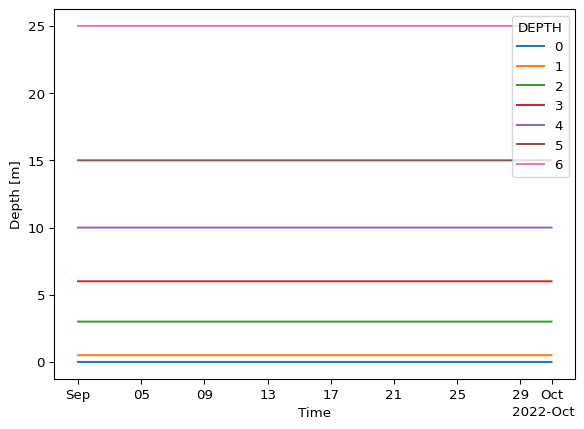

In [4]:
fino.DEPH.plot.line(x="TIME")

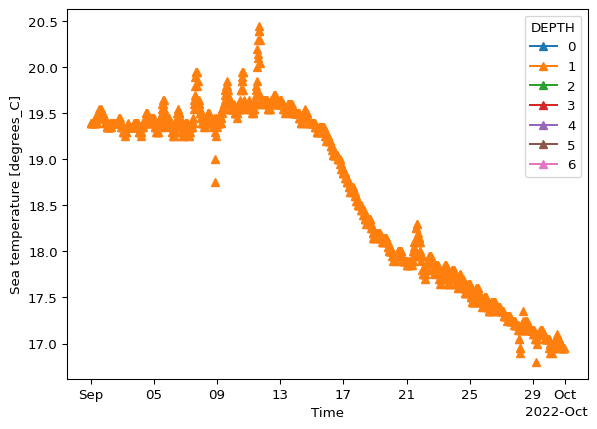

In [5]:
fino['TEMP'].plot.line("-^",x='TIME')

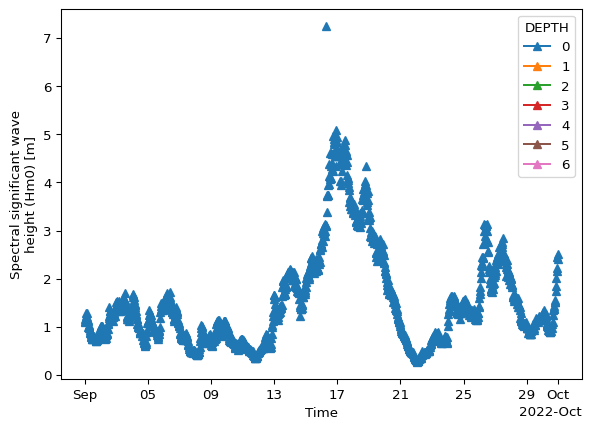

In [6]:
fino['VHM0'].plot.line("-^",x='TIME')

Wave data are only available at the surface.

In [7]:
fino[['VHM0','VTZA','VPED']].isel(DEPTH=0)

<xarray.Dataset> Size: 104kB
Dimensions: (TIME: 2879)
Coordinates:
 * TIME (TIME) datetime64[ns] 23kB 2022-09-01 ... 2022-09-30T23:31:59.99...
 DEPH (TIME) float32 12kB ...
Data variables:
 VHM0 (TIME) float64 23kB ...
 VTZA (TIME) float64 23kB ...
 VPED (TIME) float64 23kB ...
Attributes: (12/46)
 platform_code: FINO1
 platform_name: 
 data_mode: M
 title: NWS - NRT in situ Observations
 summary: Oceanographic data from North West Shelf
 naming_authority: Copernicus Marine In Situ
 ... ...
 doi: 
 pi_name: 
 qc_manual: OceanSITES User's Manual v1.2
 date_update: 2022-10-07T05:39:40Z
 history: 2022-10-01T18:04:25Z : Creation; 2022-10-...
 wmo_inst_type: xarray.Dataset Dimensions: TIME : 2879 Coordinates: (2) TIME (TIME) datetime64[ns] 2022-09-01 ... 2022-09-30T23:31:... long_name : Time standard_name : time valid_min : -90000.0 valid_max : 90000.0 uncertainty : comment : axis : T ancillary_variables : TIME_QC array(['2022-09-01T00:00:00.000000000', '2022-09-01T00:02:00.000000000',
 '2022-09-01T00:30:00.000000000', ..., '2022-09-30T23:02:00.000000000',
 '2022-09-30T23:30:00.000000000', '2022-09-30T23:31:59.999999744'],
 dtype='datetime64[ns]') DEPH (TIME) float32 ... long_name : Depth standard_name : depth units : m positive : down valid_min : -12000.0 valid_max : 12000.0 uncertainty : comment : axis : Z reference : sea_level data_mode : R ancillary_variables : DEPH_QC [2879 values with dtype=float32] Data variables: (3) VHM0 (TIME) float64 ... standard_name : sea_surface_wave_significant_height units : m long_name : Spectral significant wave height (Hm0) valid_min : 1 valid_max : 25000 comment : uncertainty : accuracy : precision : resolution : cell_methods : type_of_analysis : spectral analysis sensor_depth : 0.0 sensor_mount : sensor_orientation : data_mode : M ancillary_variables : VHM0_QC VHM0_DM [2879 values with dtype=float64] VTZA (TIME) float64 ... standard_name : sea_surface_wave_mean_period units : s long_name : Average zero crossing wave period (Tz) valid_min : 2000 valid_max : 25000 comment : uncertainty : accuracy : precision : resolution : cell_methods : type_of_analysis : zero crossing sensor_depth : 0.0 sensor_mount : sensor_orientation : data_mode : R ancillary_variables : VTZA_QC [2879 values with dtype=float64] VPED (TIME) float64 ... standard_name : sea_surface_wave_from_direction_at_variance_spectral_density_maximum units : degree long_name : Wave principal direction at spectral peak valid_min : 0 valid_max : 360000 comment : uncertainty : accuracy : precision : resolution : cell_methods : type_of_analysis : spectral analysis sensor_depth : 0.0 sensor_mount : sensor_orientation : data_mode : M ancillary_variables : VPED_QC VPED_DM [2879 values with dtype=float64] Indexes: (1) TIME PandasIndex PandasIndex(DatetimeIndex([ '2022-09-01 00:00:00',
 '2022-09-01 00:02:00',
 '2022-09-01 00:30:00',
 '2022-09-01 00:32:00',
 '2022-09-01 01:00:00',
 '2022-09-01 01:01:59.999999744',
 '2022-09-01 01:30:00',
 '2022-09-01 01:32:00',
 '2022-09-01 02:00:00',
 '2022-09-01 02:02:00',
 ...
 '2022-09-30 21:30:00',
 '2022-09-30 21:32:00',
 '2022-09-30 22:00:00',
 '2022-09-30 22:01:59.999999744',
 '2022-09-30 22:30:00',
 '2022-09-30 22:32:00',
 '2022-09-30 23:00:00',
 '2022-09-30 23:02:00',
 '2022-09-30 23:30:00',
 '2022-09-30 23:31:59.999999744'],
 dtype='datetime64[ns]', name='TIME', length=2879, freq=None)) Attributes: (46) platform_code : FINO1 platform_name : data_mode : M title : NWS - NRT in situ Observations summary : Oceanographic data from North West Shelf naming_authority : Copernicus Marine In Situ id : NO_TS_MO_FINO1_202209 wmo_platform_code : 6201065 ices_platform_code : source : mooring source_platform_category_code : 48 institution_edmo_code : 3356 institution : R and D centre Kiel University of Applied Sciences institution_references : www.fh-kiel-gmbh.de/en/ site_code : comment : contact : cmems-service@bsh.de area : North Atlantic Ocean geospatial_lat_min : 54.00000 geospatial_lat_max : 54.00000 geospatial_lon_

In [8]:
df = fino[['VHM0','VTZA','VPED']].isel(DEPTH=0).to_dataframe()

The data are stored on the concurrent timesteps.

In [9]:
df[['VHM0','VTZA','VPED']].head()

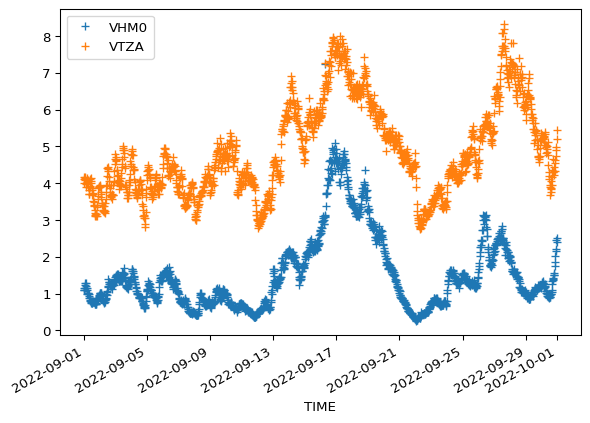

In [10]:
df[['VHM0','VTZA']].plot(style='+')

Convert the wave height data to a mikeio dataset.

In [11]:
ds = mikeio.from_pandas(
    df[["VHM0"]].dropna(), items=mikeio.ItemInfo(mikeio.EUMType.Significant_wave_height)
)
ds

<mikeio.Dataset>
dims: (time:1439)
time: 2022-09-01 00:02:00 - 2022-09-30 23:31:59.999999744 (1439 non-equidistant records)
geometry: GeometryUndefined()
items:
  0:  VHM0 <Significant wave height> (meter)

Store the results in Dfs0 format.

In [12]:
ds.to_dfs("FINO1_VHM0.dfs0")

Read the file again to check…

In [13]:
ds = mikeio.read("FINO1_VHM0.dfs0")
ds

<mikeio.Dataset>
dims: (time:1439)
time: 2022-09-01 00:02:00 - 2022-09-30 23:32:00 (1439 non-equidistant records)
geometry: GeometryUndefined()
items:
  0:  VHM0 <Significant wave height> (meter)